# Lab 2: Image Enhancement

Adele Younis (20944650) and Meg Paulson (21038856)

**Introduction**

...

In [61]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import skimage.util
import scipy.ndimage as ndimage
from scipy import signal
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np


plt.gray()
lena= imread('lena.tiff')
cameraman = imread('cameraman.tif').astype(np.float64)/255


def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))


<Figure size 640x480 with 0 Axes>

**2. Discrete Convolution for Image Processing**

In [62]:
# Prepare Lena Image
lena = rgb2gray(lena)

# impulse functions
h1 = (1/6)*np.ones((1,6)) # horizontal averaging filter
h2 = h1.T # vertical averaging filter (transpose of h1 to make it vertical)
h3 = np.array([[-1, 1]]) # edge detection filter

# convolve with impulse functions
lena_h1 = signal.convolve2d(lena, h1, boundary='symm')
lena_h2 = signal.convolve2d(lena, h2, boundary='symm')
lena_h3 = signal.convolve2d(lena, h3, boundary='symm')


Text(0.5, 1.0, 'Convolved with h3')

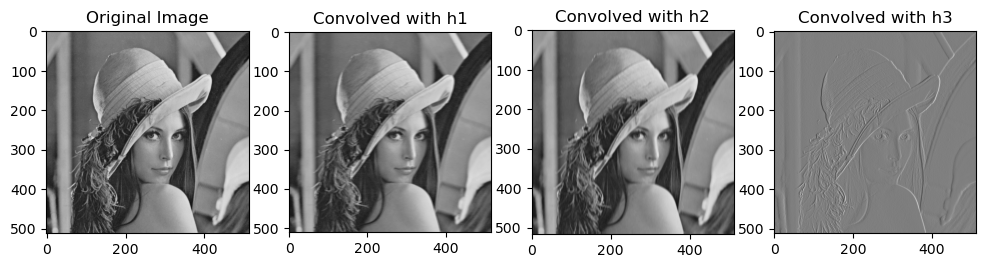

In [63]:
# plot images
fig, axes = plt.subplots(1, 4, figsize=(12,8))

axes[0].imshow(lena, cmap='gray', vmin=0, vmax=1)
axes[0].set_title('Original Image')

axes[1].imshow(lena_h1, cmap='gray', vmin=0, vmax=1)
axes[1].set_title('Convolved with h1')  # horizontal averaging filter

axes[2].imshow(lena_h2, cmap='gray', vmin=0, vmax=1)
axes[2].set_title('Convolved with h2')  # vertical averaging filter

axes[3].imshow(lena_h3, cmap='gray') ## Come back to 
axes[3].set_title('Convolved with h3')  # horizontal edge filter

**1. What did convolving the image with h1 do to the image? Looking at the impulse function, explain**
**why convolving the image with h1 yields such results.**

Visually, convolving the image with h1 (horizontal averaging) slightly increased the contrast of the image while making the vertical lines more blurry. This can especially be noticed in the woman's hair, where vertical edges in the original image are hard to see in the h1 image. Looking at the impulse function, h1, we can see that it is a 1x6 matrix - meaning that each center pixel is averaged with its five nearest horizontal neighbours. This impulse may hide rapid changes within the horizontal filter, making the output appear more blurry across the horizontal direction. 


**2. What did convolving the image with h2 do to the image? Looking at the impulse function, explain**
**why convolving the image with h2 yields such results.**

Visually, convolving the image with h2 (vertical averaging) makes the image appear blurry blurred in the vertical direction, reducing the sharpness in the horizontal lines in the background of the image. When looking at the h2 impulse function, we can see that it is a 6x1 matrix, where each center pixel is averages with it's five nearest vertical neighbours. Being that h2 is the transpose of h1, it make's sense that not the output appears more blurry in the opposite direction to h1, as h2 is now poor at displaying rapic changes in the vertical direction. 

**3. What did convolving the image with h3 do to the image? Looking at the impulse function, explain**
**why convolving the image with h3 yields such results.**

**4. Based on these results, what role can convolution perform in the context of image processing?**

From this exercise, we can conclude that convolution can perform various image post-processing operations depending on what kernel/filter is used. Convolution can be used to either suppress/hide (h1, h2) or enhance (h3) specific features within an image. 

**3. Noise Generation**

In [64]:
def imnoise_speckle(im, v):
    # im: input image
    # v: variance
    n = np.sqrt(v*12) * (np.random.rand(im.shape[0], im.shape[1]) - 0.5)
    return im + im * n

In [65]:
# define toy image
toy_image = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])

# Gaussian
toy_gaussian = skimage.util.random_noise(toy_image, mode='gaussian', mean=0, var=0.01)

# salt and pepper
toy_sp = skimage.util.random_noise(toy_image, mode='s&p', amount=0.05)

# multiplicative speckle
toy_speckle = imnoise_speckle(toy_image, 0.04)


Text(0.5, 1.0, 'Histogram of Speckle Noise')

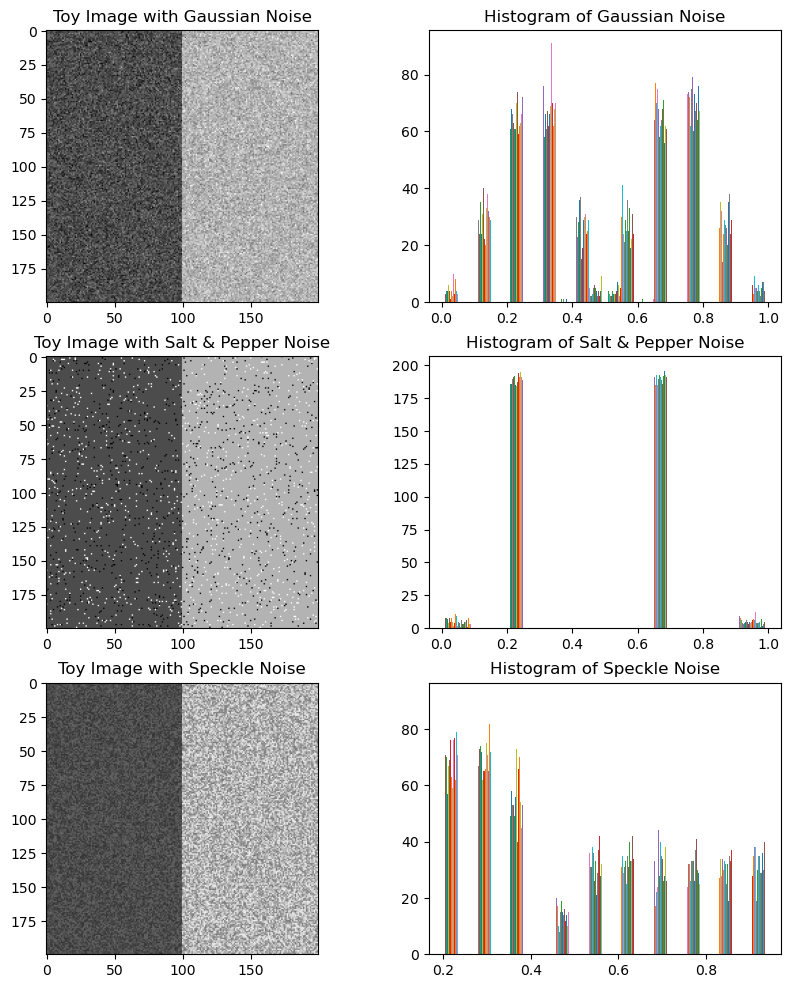

In [66]:
# plot images and histograms
fig, axes = plt.subplots(3, 2, figsize=(10,12))
axes[0,0].imshow(toy_gaussian, vmin=0, vmax=1)
axes[0,0].set_title('Toy Image with Gaussian Noise')
axes[0,1].hist(toy_gaussian)
axes[0,1].set_title('Histogram of Gaussian Noise')

axes[1,0].imshow(toy_sp, vmin=0, vmax=1)
axes[1,0].set_title('Toy Image with Salt & Pepper Noise')
axes[1,1].hist(toy_sp)              
axes[1,1].set_title('Histogram of Salt & Pepper Noise')

axes[2,0].imshow(toy_speckle, vmin=0,   vmax=1)     
axes[2,0].set_title('Toy Image with Speckle Noise')
axes[2,1].hist(toy_speckle)
axes[2,1].set_title('Histogram of Speckle Noise')

***5. Describe each of the histograms in the context of the corresponding noise models. Why do they appear that way?***

The Gaussian noise histogram has the general shape of two gaussian curves joint together, where one curve peaks at around 0.3, and the other peaks at around 0.7. The two curves appear about the same in height and width about the peaks, indicating that both halves of the image were perserved well. This corresponds with the image and gaussian model as the noise is smoothed with a normal distribution. Since the gaussian noise model has a mean of 0, we are allowing for the pixels to increase or decrease in intenisty around the original pixel value. The gaussian model histogram appears very symmetrical, indicating that difference in original pixel values do not affect the amount of noise added.

The Salt and Pepper noise histogram has only 4 points in the histogram, with peaks at 0.3 and 0.7, and smaller artifcats around 0 (pepper) and 1 (salt). The histogram alligns well with what we expected from the salt and pepper model, as about 5% of the pixels fall within the extreme 0 and 1 values, while the majority of the image is still consistent with the original image. Similar to the gaussian model, the salt and pepper histogram is noticeably very symmetrical, indicating that the noise level is independant of pixel intensity. 

The speckle noise histogram is the only one that does not look relatively the same between 0.3 and 0.7. The speckle noise histogram indicates that there are more lower intensity (<0.3) pixels, and less higher intensity (0.3>). This aligns with what we know of multiplicative noise models, where the noise level scales with the signal intensity. Since the right half of the image is brighter, it experiences more noise than the left side. This causes asymmetry in the histogram of the speckled image. 

***6. Are there visual differences between the noise contaminated images? What are they? Why?***

Yes, the visual difference can be especially noticed in the salt & pepper image in comparison to the other two. The salt and pepper noise appears more random, as the added noise is independant of the half of the image it is in. For the guassian and speckle images, the images seem grainy and rough. For the guassian image the graininess is consistent across both halves of the image, as the noise magnitude is independant of the pixel values. However, the speckled image noise is more noticable in the right half, as the brighter intensity accounts for more noise. 

***7. In the speckle noise case, what is the underlying distribution used? Can you tell from the histogram? How?***

The underlying distribution appears uniform about the variance across all pixel values when looking at the histogram. The distribution of pixels around 0.3 and 0.7 appears to be spread evenly, rather than forming bell-curves or sharp spikes. 

***8. In the speckle noise case, you will notice that the peaks of the histogram are no longer of the same***
***height as they were in the original image. Also, the spread around each of the peaks is also different from each other. Why? ***
The speckle noise image does not have the same peaks as seen in the other two histograms because it is multiplicative, and not additive. in Multiplicative models, the noise magnitude scales with the pixel intensity so larger signals have larger noise magnitudes. In our other two additive models, the noise magnitude is independant of the pixel intensity, indicating that the noise amplitude is constant across all intensities. 